In [1]:
import random
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from transformers import ViTForImageClassification, ViTImageProcessor

c:\Users\vipuser\miniconda3\envs\self_register\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# デバイスの設定
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# データの前処理
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# CIFAR-10データセットの導入
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified


In [4]:
# モデルの名前と保存先のパス
model_name = "google/vit-base-patch16-224"
model_path = "google_vit_cifar10"

# モデルをロード
model = ViTForImageClassification.from_pretrained(model_path)
model.to(device)

# ViTImageProcessorの導入
processor = ViTImageProcessor.from_pretrained(model_name, do_rescale=False)

# データセットからランダムに40枚の画像を抽出
def get_random_samples(dataset, num_samples=40):
    indices = random.sample(range(len(dataset)), num_samples)
    samples = [dataset[i] for i in indices]
    return samples

# サンプルを取得
random_samples = get_random_samples(test_dataset, 40)

# 抽出した画像とラベルをリストに分ける
sample_images, sample_labels = zip(*random_samples)

# 画像をモデルの入力形式に変換
sample_images_np = [img.numpy().transpose((1, 2, 0)) for img in sample_images]
sample_images_tensors = [torch.tensor(img) for img in sample_images_np]
encodings = processor(images=sample_images_tensors, return_tensors="pt")

c:\Users\vipuser\miniconda3\envs\self_register\Lib\site-packages\transformers\models\vit\modeling_vit.py:253: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  context_layer = torch.nn.functional.scaled_dot_product_attention(


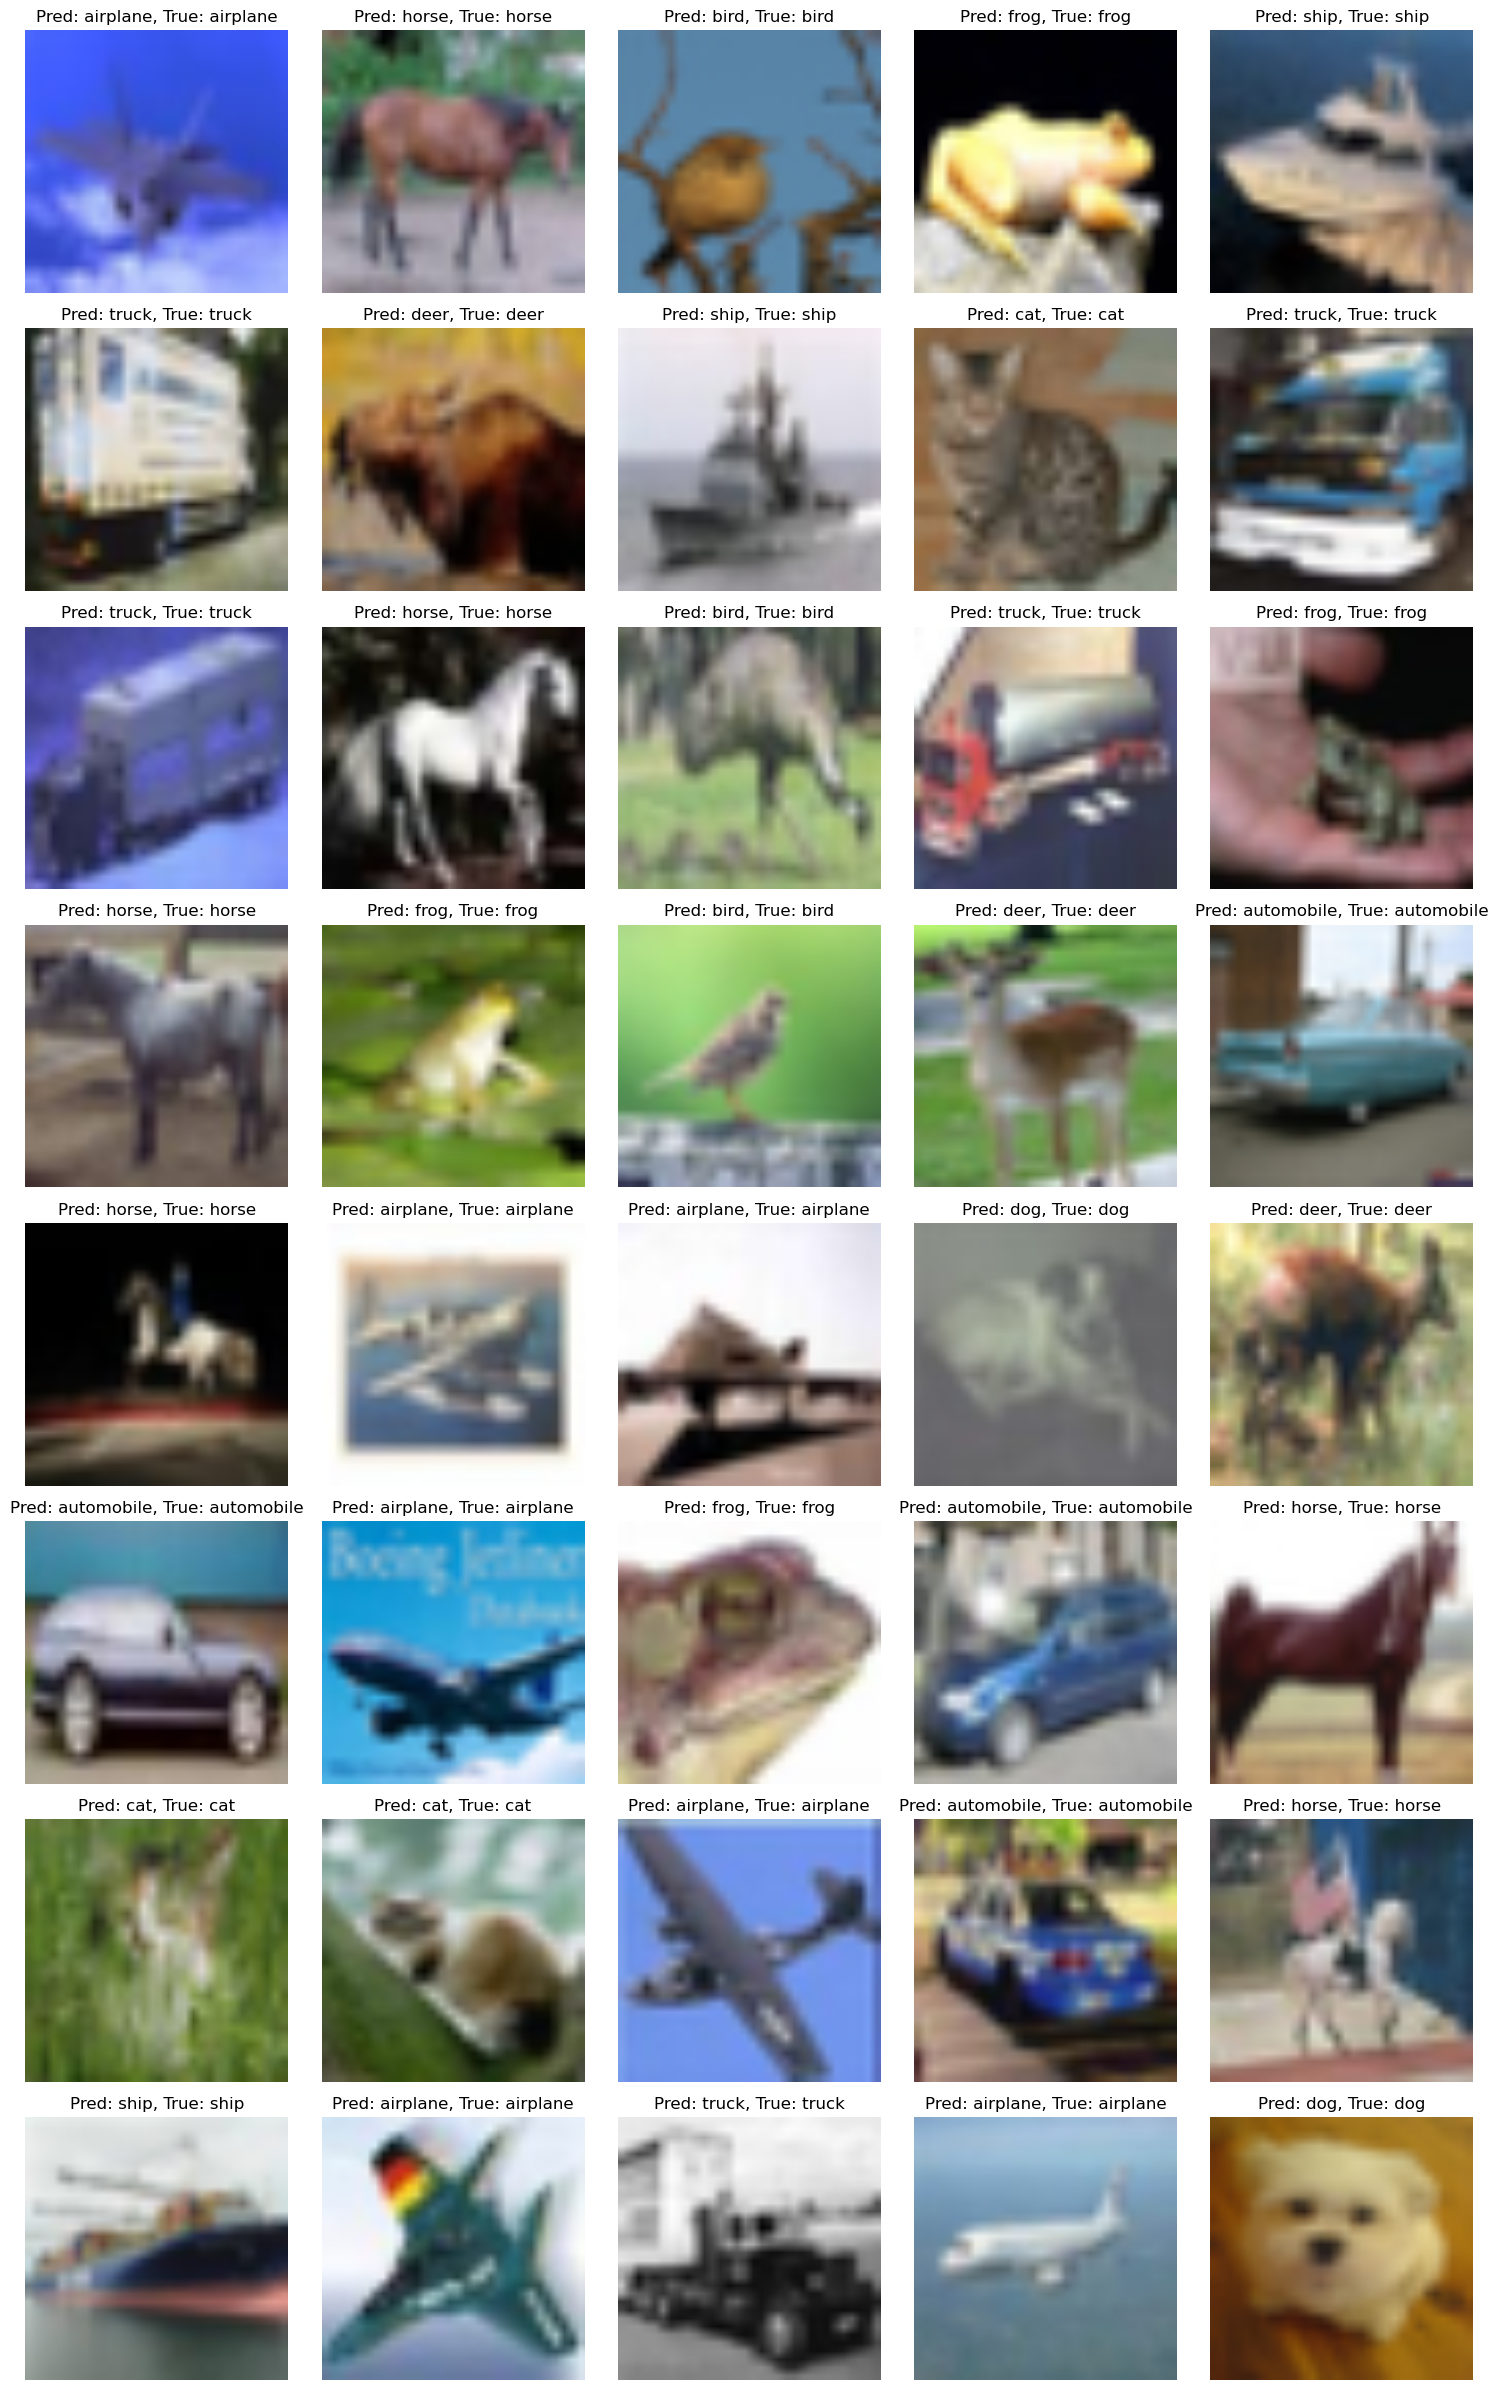

In [5]:
# モデルで予測
model.eval()
with torch.no_grad():
    encodings = {k: v.to(device) for k, v in encodings.items()}
    outputs = model(**encodings)
    preds = torch.argmax(outputs.logits, dim=-1)

# 結果を表示
num_samples = 40
num_cols = 5
num_rows = num_samples // num_cols

plt.figure(figsize=(15, num_rows * 3))
for i, (img, pred, label) in enumerate(zip(sample_images_np, preds, sample_labels)):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(img)
    plt.title(f"Pred: {test_dataset.classes[pred]}, True: {test_dataset.classes[label]}")
    plt.axis('off')
plt.tight_layout()
plt.show()